## Лабораторная работа № 4

### Задание № 6

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Чтение таблицы x - f(x) из файла

xArr = np.zeros((10), dtype = float)
yArr = np.zeros((10), dtype = float)

openFile = np.loadtxt("data.csv")
for i in range(10):
    xArr[i] = openFile[i + 220][0]
    yArr[i] = openFile[i + 220][1]
    
print (xArr)
print (yArr)

[ 23.   23.1  23.2  23.3  23.4  23.5  23.6  23.7  23.8  23.9]
[ -4.60000000e-04   3.09544000e-01   5.91083000e-01   8.16324000e-01
   9.62789000e-01   1.01560500e+00   9.69005000e-01   8.26959000e-01
   6.02835000e-01   3.18152000e-01]


In [3]:
def getC(power, xArr):
    c = np.zeros((2 * power + 1), dtype = float)
    
    for k in range(2 * power + 1):
        for i in range(10):
            c[k] += xArr[i] ** k
            
    return c

In [4]:
def getB(power, xArr, yArr):
    b = np.zeros((power + 1), dtype = float)
    
    for k in range(power + 1):
        for i in range(10):
            b[k] += yArr[i] * xArr[i] ** k
            
    return b

In [5]:
def getCArr(power, c):
    cArr = np.zeros((power + 1, power + 1), dtype = float)
    
    for k in range(power + 1):
        j = k
        for i in range(power + 1):
            cArr[k][i] = c[j]
            j = j + 1
            
    return cArr

In [6]:
def getPolinom(power, xArr, yArr):
    polinom = np.zeros((10), dtype = float)
    
    c = getC(power, xArr)
    b = getB(power, xArr, yArr)
    cArr = getCArr(power, c)
    res = np.linalg.solve(cArr, b)

    for i in range(10):
        for j in range(power + 1):
            polinom[i] += res[j] * xArr[i] ** j
            
    return polinom

In [11]:
polinom = getPolinom(2, xArr, yArr)
print (polinom)

[-0.03714211  0.33494432  0.62402547  0.83010136  0.95317199  0.99323734
  0.95029744  0.82435226  0.61540182  0.32344611]


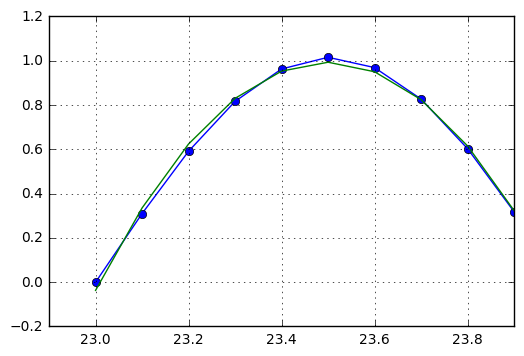

In [12]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.grid()
axes.plot(xArr, yArr, 'o-', xArr, polinom)
plt.show()